In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import seaborn as sns
# Filter the dataframe for male entries
plt.style.use('seaborn-whitegrid')

# Load the data
df = pd.read_csv('./walmart_data.csv')
df.columns = [c.lower() for c in df.columns]
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


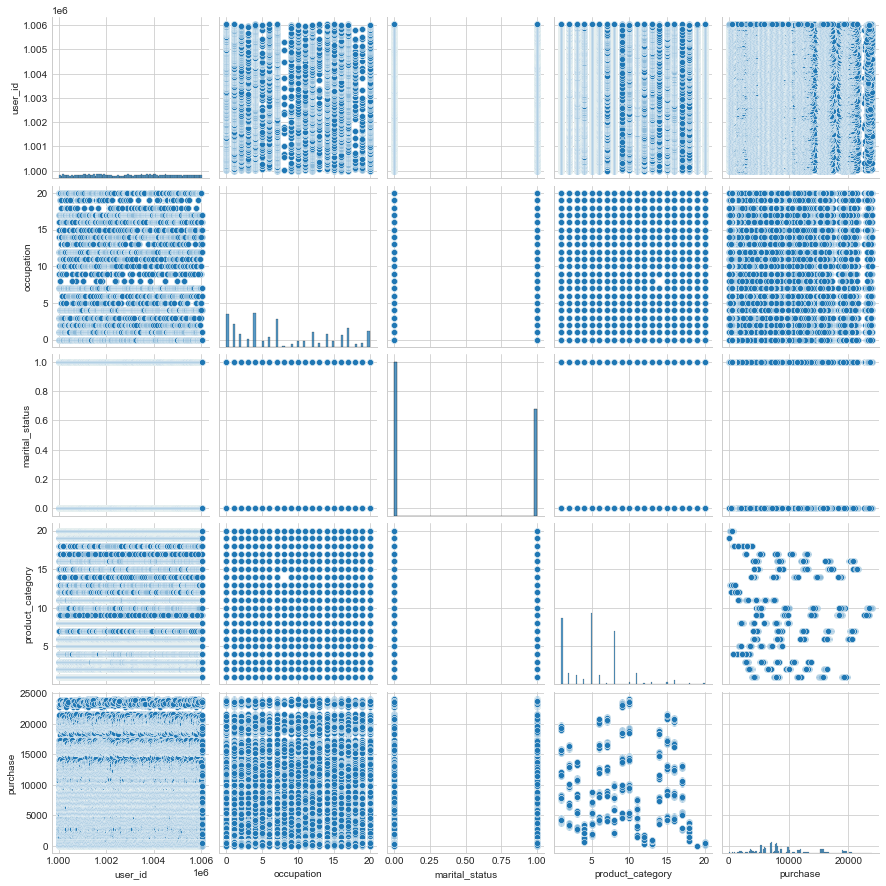

In [3]:
sns.pairplot(df)

In [3]:
user_agg_df = df.groupby(['user_id']).agg({
    'product_id': 'count',
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

user_agg_df.head()

,user_id,product_id,purchase,occupation,gender,age,city_category,stay_in_current_city_years,marital_status
0,1000001,35,334093,10,F,0-17,A,2,0
1,1000002,77,810472,16,M,55+,C,4+,0
2,1000003,29,341635,15,M,26-35,A,3,0
3,1000004,14,206468,7,M,46-50,B,2,1
4,1000005,106,821001,20,M,26-35,A,1,1


In [4]:
user_agg_df.groupby(['gender']).purchase.mean()

gender
F    712024.394958
M    925344.402367
Name: purchase, dtype: float64

In [5]:
Y = user_agg_df['purchase']
X = (user_agg_df[['gender']]=='F').astype(int)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     61.69
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           4.75e-15
Time:                        18:37:40   Log-Likelihood:                -89373.
No. Observations:                5891   AIC:                         1.788e+05
Df Residuals:                    5889   BIC:                         1.788e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.253e+05   1.44e+04     64.067      0.0

In [6]:
user_agg_df['CityC'] = (user_agg_df['city_category'] == 'C').astype(int)
user_agg_df['CityB'] = (user_agg_df['city_category'] == 'B').astype(int)
user_agg_df['Female'] = (user_agg_df[['gender']]=='F').astype(int)

In [7]:
Y = user_agg_df['purchase']
X = user_agg_df[['CityC', 'CityB', 'Female']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     360.9
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          3.68e-215
Time:                        18:37:40   Log-Likelihood:                -88907.
No. Observations:                5891   AIC:                         1.778e+05
Df Residuals:                    5887   BIC:                         1.778e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.323e+06   2.78e+04     47.679      0.0

In [8]:
user_agg_df = df.groupby(['user_id']).agg({
    'product_id': 'count',
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

columns = user_agg_df.columns


In [9]:
features = ['gender', 'age']
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

Y = df_encoded['purchase']
X = df_encoded.drop(columns=[c for c in columns if c not in features + ['product_id']]).astype(float) # product_id is th enumber of proudcts
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.749e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:44   Log-Likelihood:                -79947.
No. Observations:                5891   AIC:                         1.599e+05
Df Residuals:                    5882   BIC:                         1.600e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.163e+04   1.34e+04     -1.615      0.1

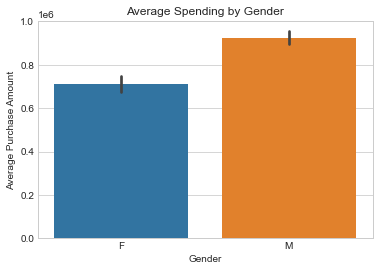

In [10]:
import seaborn as sns

sns.barplot(x=user_agg_df['gender'], y=user_agg_df['purchase'])
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount")
plt.title("Average Spending by Gender")
plt.show()

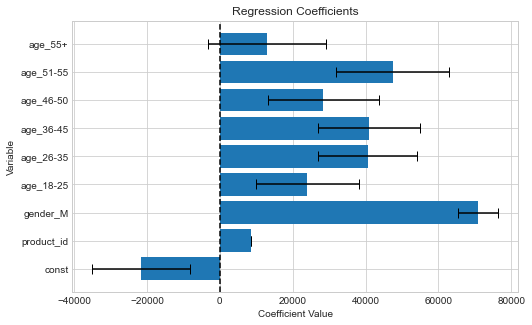

In [11]:
coefs = results.params  # Regression coefficients
errors = results.bse    # Standard errors

plt.figure(figsize=(8, 5))
plt.barh(coefs.index, coefs.values, xerr=errors, capsize=5)
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.title("Regression Coefficients")
plt.axvline(0, color='black', linestyle='--')  # Reference line at 0
plt.show()

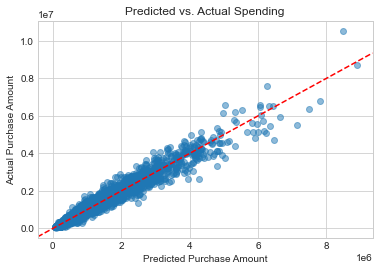

In [12]:
plt.scatter(results.fittedvalues, Y, alpha=0.5)
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Actual Purchase Amount")
plt.title("Predicted vs. Actual Spending")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Ideal fit line
plt.show()


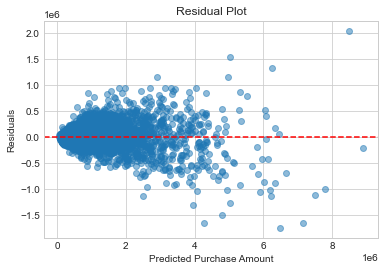

In [13]:
residuals = results.resid
plt.scatter(results.fittedvalues, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [14]:
features = ['gender', 'age', 'city_category', 'stay_in_current_city_years', 'marital_status']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id'])  # Remove target and ID column

# Add intercept
X = sm.add_constant(X)

# Run multiple linear regression
model = sm.OLS(Y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     8771.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:45   Log-Likelihood:                -79936.
No. Observations:                5891   AIC:                         1.599e+05
Df Residuals:                    5874   BIC:                         1.600e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [15]:
features = ['gender', 'age', 'city_category', 'stay_in_current_city_years', 'marital_status']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id'])  # Remove target and ID column

# Add intercept
X = sm.add_constant(X)

weights = 1 / user_agg_df['gender'].map(user_agg_df['gender'].value_counts(normalize=True))  # Inverse frequency weighting
model = sm.WLS(Y, X, weights=weights).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     9085.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:45   Log-Likelihood:                -79892.
No. Observations:                5891   AIC:                         1.598e+05
Df Residuals:                    5874   BIC:                         1.599e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [16]:
features = ['gender', 'age', 'city_category', 'stay_in_current_city_years', 'marital_status']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id'])  # Remove target and ID column

# Add intercept
X = sm.add_constant(X)


model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     8771.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:45   Log-Likelihood:                -79936.
No. Observations:                5891   AIC:                         1.599e+05
Df Residuals:                    5874   BIC:                         1.600e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [17]:
user_agg_df['log_purchase'] = np.log1p(user_agg_df['purchase'])

Y = user_agg_df['log_purchase']
model = sm.WLS(Y, X, weights=weights).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:           log_purchase   R-squared:                       0.704
Model:                            WLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     871.9
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:45   Log-Likelihood:                -4999.1
No. Observations:                5891   AIC:                         1.003e+04
Df Residuals:                    5874   BIC:                         1.015e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

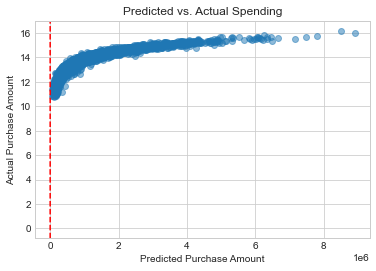

In [18]:
plt.scatter(results.fittedvalues, Y, alpha=0.5)
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Actual Purchase Amount")
plt.title("Predicted vs. Actual Spending")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Ideal fit line
plt.show()

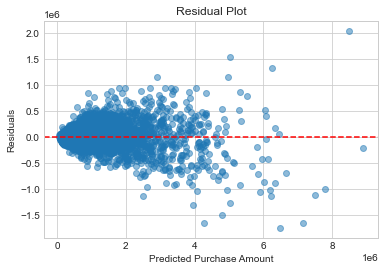

In [19]:
residuals = results.resid
plt.scatter(results.fittedvalues, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [20]:
user_agg_df = df.groupby(['user_id']).agg({
    'product_id': 'count',
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

# Create duammy variables for categorical columns
features = ['gender', 'age', 'city_category']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id', 'stay_in_current_city_years', 'marital_status'])

# Add constant (intercept)
X = sm.add_constant(X)

# Drop columns with high p-values
X = X.drop(['occupation', 'age_18-25', 'age_46-50', 'age_55+'], axis=1)

# Calculate weights using inverse frequency of gender
weights = 1 / user_agg_df['gender'].map(user_agg_df['gender'].value_counts(normalize=True))

# Fit the weighted least squares model
model = sm.WLS(Y, X, weights=weights).fit()

# Print model summary
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 2.076e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:48   Log-Likelihood:                -79896.
No. Observations:                5891   AIC:                         1.598e+05
Df Residuals:                    5883   BIC:                         1.599e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9944.5188   7413.207     

In [13]:
user_agg_df = df.groupby(['user_id']).agg({
    'product_id': 'count',
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

# Create dummy variables for categorical columns
features = ['gender', 'age', 'city_category']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id', 'stay_in_current_city_years', 'marital_status'])

# Add constant (intercept)
X = sm.add_constant(X)

# Drop columns with high p-values
X = X.drop(['occupation', 'age_18-25', 'age_46-50', 'age_55+'], axis=1)

# Calculate weights using inverse frequency of gender
weights = 1 / user_agg_df['gender'].map(user_agg_df['gender'].value_counts(normalize=True))

# Fit the weighted least squares model
model = sm.WLS(Y, X, weights=weights).fit()

# Print model summary
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 2.076e+04
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:49:09   Log-Likelihood:                -79896.
No. Observations:                5891   AIC:                         1.598e+05
Df Residuals:                    5883   BIC:                         1.599e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9944.5188   7413.207     

In [45]:
user_agg_df = df.groupby(['user_id', 'product_id']).agg({
    'product_id': 'count', # need to replace this by counting something else
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

# Create dummy variables for categorical columns
features = ['gender', 'age', 'city_category', 'marital_status']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)
df_encoded['marriage_gender'] = df_encoded['marital_status_1'] * df_encoded['gender_M']

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id', 'stay_in_current_city_years'])

# Add constant (intercept)
X = sm.add_constant(X)

# Drop columns with high p-values
X = X.drop(['occupation', 'age_18-25', 'age_46-50', 'age_55+'], axis=1)

# Calculate weights using inverse frequency of gender
weights = 1 / user_agg_df['gender'].map(user_agg_df['gender'].value_counts(normalize=True))

# Fit the weighted least squares model
model = sm.WLS(Y, X, weights=weights).fit()

# Print model summary
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.615e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:57:44   Log-Likelihood:                -79894.
No. Observations:                5891   AIC:                         1.598e+05
Df Residuals:                    5881   BIC:                         1.599e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.333e+04   7853.074  

In [44]:
df_encoded

,user_id,product_id,purchase,occupation,stay_in_current_city_years,gender_M,age_18-25,age_26-35,age_36-45,age_46-50,age_51-55,age_55+,city_category_B,city_category_C,marital_status_1
0,1000001,35,334093,10,2,0,0,0,0,0,0,0,0,0,0
1,1000002,77,810472,16,4+,1,0,0,0,0,0,1,0,1,0
2,1000003,29,341635,15,3,1,0,1,0,0,0,0,0,0,0
3,1000004,14,206468,7,2,1,0,0,0,1,0,0,1,0,1
4,1000005,106,821001,20,1,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,1006036,514,4116058,15,4+,0,0,1,0,0,0,0,1,0,1
5887,1006037,122,1119538,1,4+,0,0,0,0,1,0,0,0,1,0
5888,1006038,12,90034,1,2,0,0,0,0,0,0,1,0,1,0
5889,1006039,74,590319,0,4+,0,0,0,0,1,0,0,1,0,1


In [23]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your independent variables (after adding the constant)
X = sm.add_constant(X)  # Add constant if not already included

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print(vif_data)

           feature        VIF
0            const  11.584072
1       product_id   1.189569
2         gender_M   1.007658
3        age_26-35   1.281906
4        age_36-45   1.231191
5        age_51-55   1.120272
6  city_category_B   1.874718
7  city_category_C   2.080808


In [24]:
from scipy.stats import chi2_contingency

# Example: Testing independence between gender and purchase (categorizing purchase into "high" and "low")
df['purchase_category'] = df['purchase'].apply(lambda x: 'high' if x > df['purchase'].median() else 'low')

# Create contingency table
contingency_table = pd.crosstab(df['gender'], df['purchase_category'])

# Perform Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

KeyboardInterrupt: 

In [6]:
import pandas as pd
import statsmodels.api as sm

# Load data
data = pd.read_csv("./walmart_data.csv")

# Drop User_ID (not useful for analysis)
data = data.drop(columns=['User_ID'])

# One-Hot Encoding for Gender, City_Category, Stay_In_Current_City_Years
data = pd.get_dummies(data, columns=['Gender', 'City_Category', 'Stay_In_Current_City_Years'], drop_first=True)

# Label Encoding for Age (Ordinal Category)
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
data['Age'] = data['Age'].map(age_mapping)

# Frequency Encoding for Product_ID (Counts of how often each product appears)
freq_encoding = data['Product_ID'].value_counts().to_dict()
data['Product_ID'] = data['Product_ID'].map(freq_encoding)

# Define features (X) and target variable (y)
X = data.drop(columns=['Purchase'])  # Features
y = data['Purchase']  # Target variable

# Add a constant for the intercept
X = sm.add_constant(X)

# Compute inverse sample weights (to balance gender proportions)
gender_counts = data['Gender_M'].value_counts()
weights = data['Gender_M'].map(lambda x: 1 / gender_counts[x])

# Fit Weighted Least Squares (WLS) regression
model = sm.WLS(y, X, weights=weights).fit()

# Print regression summary
print(model.summary())


                            WLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.175
Model:                            WLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     9723.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:09:50   Log-Likelihood:            -5.4435e+06
No. Observations:              550068   AIC:                         1.089e+07
Df Residuals:                  550055   BIC:                         1.089e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


                          Feature        VIF
0                           const  20.498873
9    Stay_In_Current_City_Years_1   2.345518
10   Stay_In_Current_City_Years_2   1.933495
11   Stay_In_Current_City_Years_3   1.892469
12  Stay_In_Current_City_Years_4+   1.813444
8                 City_Category_C   1.531744
7                 City_Category_B   1.496343
2                             Age   1.137268
4                  Marital_Status   1.108190
1                      Product_ID   1.059603
5                Product_Category   1.049842
3                      Occupation   1.025022
6                        Gender_M   1.018210


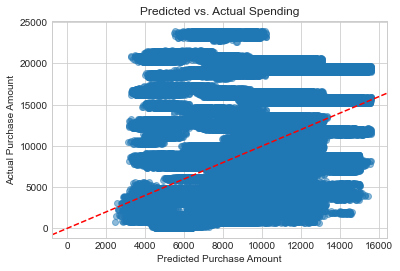

In [9]:
plt.scatter(model.fittedvalues, y, alpha=0.5)
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Actual Purchase Amount")
plt.title("Predicted vs. Actual Spending")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Ideal fit line
plt.show()

In [10]:
categories = data['Product_Category'].unique()

for category in categories:
    subset = data[data['Product_Category'] == category]
    
    # Define X and y
    X = subset.drop(columns=['Purchase'])
    y = subset['Purchase']
    
    X = sm.add_constant(X)
    
    model = sm.WLS(y, X, weights=subset['Gender_M'].map(lambda x: 1 / subset['Gender_M'].value_counts()[x])).fit()
    
    print(f"Product Category {category} Regression Results:")
    print(model.summary())
    print("\n" + "="*80 + "\n")


Product Category 3 Regression Results:
                            WLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.054
Model:                            WLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     103.8
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          2.31e-231
Time:                        17:14:06   Log-Likelihood:            -1.8955e+05
No. Observations:               20213   AIC:                         3.791e+05
Df Residuals:                   20201   BIC:                         3.792e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Product Category 8 Regression Results:
                            WLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.054
Model:                            WLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     596.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:17:56   Log-Likelihood:            -1.0301e+06
No. Observations:              113925   AIC:                         2.060e+06
Df Residuals:                  113913   BIC:                         2.060e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Product Category 2 Regression Results:
                            WLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.088
Model:                            WLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     210.4
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:20:51   Log-Likelihood:            -2.2975e+05
No. Observations:               23864   AIC:                         4.595e+05
Df Residuals:                   23852   BIC:                         4.596e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Product Category 11 Regression Results:
                            WLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.102
Model:                            WLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     250.4
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:21:09   Log-Likelihood:            -2.1838e+05
No. Observations:               24287   AIC:                         4.368e+05
Df Residuals:                   24275   BIC:                         4.369e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Product Category 7 Regression Results:
                            WLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.025
Model:                            WLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     8.483
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           5.96e-15
Time:                        17:21:14   Log-Likelihood:                -36479.
No. Observations:                3721   AIC:                         7.298e+04
Df Residuals:                    3709   BIC:                         7.306e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Product Category 10 Regression Results:
                            WLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.017
Model:                            WLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.848
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           1.16e-13
Time:                        17:21:20   Log-Likelihood:                -50449.
No. Observations:                5125   AIC:                         1.009e+05
Df Residuals:                    5113   BIC:                         1.010e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Product Category 20 Regression Results:
                            WLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.007
Model:                            WLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.511
Date:                Thu, 27 Feb 2025   Prob (F-statistic):              0.120
Time:                        17:21:21   Log-Likelihood:                -16810.
No. Observations:                2550   AIC:                         3.364e+04
Df Residuals:                    2538   BIC:                         3.371e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [11]:
# Create one-hot encoding for Product_Category
data = pd.get_dummies(data, columns=['Product_Category'], prefix='Category', drop_first=True)

# Create interaction terms: Gender_M * Product_Category
for col in data.columns:
    if "Category_" in col:
        data[f'Gender_M_{col}'] = data['Gender_M'] * data[col]

# Define X and y
X = data.drop(columns=['Purchase'])
y = data['Purchase']

X = sm.add_constant(X)

# Fit model
model = sm.WLS(y, X, weights=data['Gender_M'].map(lambda x: 1 / data['Gender_M'].value_counts()[x])).fit()

print(model.summary())


                            WLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.668
Model:                            WLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                 2.169e+04
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:47:57   Log-Likelihood:            -5.1932e+06
No. Observations:              550068   AIC:                         1.039e+07
Df Residuals:                  550016   BIC:                         1.039e+07
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [12]:
import pandas as pd
import statsmodels.api as sm

# Load data
data = pd.read_csv("./walmart_data.csv")

# Drop User_ID (not useful for analysis)
data = data.drop(columns=['User_ID'])

# One-Hot Encoding for Gender, City_Category, Stay_In_Current_City_Years
data = pd.get_dummies(data, columns=['Gender', 'Stay_In_Current_City_Years', 'Product_Category'], drop_first=True)

# Label Encoding for Age (Ordinal Category)
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
data['Age'] = data['Age'].map(age_mapping)

city_mapping = {'City_Category_A': 0, 'City_Category_B': 1, 'City_Category_C': 2}
data['City_Category'] = data['City_Category'].map(city_mapping)

# Frequency Encoding for Product_ID (Counts of how often each product appears)
freq_encoding = data['Product_ID'].value_counts().to_dict()
data['Product_ID'] = data['Product_ID'].map(freq_encoding)

# Define features (X) and target variable (y)
X = data.drop(columns=['Purchase'])  # Features
y = data['Purchase']  # Target variable

# Add a constant for the intercept
X = sm.add_constant(X)

# Compute inverse sample weights (to balance gender proportions)
gender_counts = data['Gender_M'].value_counts()
weights = data['Gender_M'].map(lambda x: 1 / gender_counts[x])

# Fit Weighted Least Squares (WLS) regression
model = sm.WLS(y, X, weights=weights).fit()

# Print regression summary
print(model.summary())


MissingDataError: exog contains inf or nans